In [3]:
print (plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


###  K40  распад: энергия электронов 1.314 МэВ (89%), энергия гамма-квантов 1.460 МэВ
ZnS регистрирует прохождение заряженных частиц ?

In [42]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
import seaborn           as sns
import scipy.stats       as stats
import matplotlib.ticker as ticker

import os
import scipy
import math
import warnings

from scipy.stats.stats import pearsonr
from tqdm              import tqdm_notebook as tqdm
from scipy.optimize    import curve_fit

def func_gauss(x, sigm, mu, A):
    return np.exp(-((x-mu)**2)/(2*sigm**2))*A

def func_exp(x,A,C):
    return np.exp(x/A)*C

warnings.simplefilter('ignore')
plt.style.use('ggplot')  # Красивые графики
colors = ['darkviolet', 'gray', 'firebrick', 'darkblue', 'gold', 'chartreuse', 'darkgreen', 'darkcyan', 'aqua', 'lime', 'brown']

### Поправка на нулевой канал

Text(0.5,1,'Разность между спектрами от тория и фона')

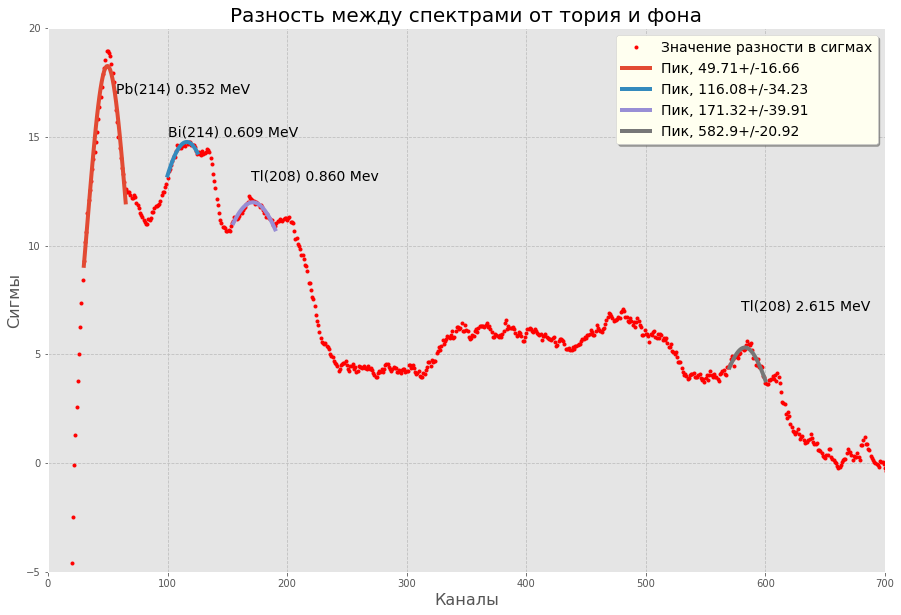

In [2]:
# Данные от тория
plt.style.use('ggplot')
names = ['0','1','2','3','4','5','6','7']

# Чтение данных за 2 полных дня
Itog2 = pd.read_csv(r"D:\spektri\msp02-16_Th_24.19", delim_whitespace = True, names = names)
Itog3 = pd.read_csv(r"D:\spektri\msp02-17_Th_24.19", delim_whitespace = True, names = names)
arr_Th = pd.DataFrame([Itog3[i] + Itog2[i] for i in names]).T

# Чтение данных за 2 полных дня
Itog1 = pd.read_csv(r"D:\spektri\msp01-31_fon_24h.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
arr_fon = pd.DataFrame([Itog1[i] + Itog2[i] for i in names]).T 

arr_raz = (arr_Th['4'] - arr_fon['4']).rolling(window = 10).mean()
x = arr_Th.index
pogr = (abs( (arr_fon['4']**0.5 + arr_Th['4']**0.5) ) - ( abs(arr_raz)/10 ) **0.5).rolling(window = 6).mean()

# Спектр разности в сигмах
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, (arr_raz/pogr), 'r.', label = 'Значение разности в сигмах')
plt.xlim([0,700])
plt.ylim([-5, 20])

arr_col = pd.DataFrame()
# Аппроксимация в интервале (30, 65) Pb(214) 0.352 MeV
x1 = arr_raz[(arr_raz.index>=30) & (arr_raz.index<=65)].index
y1 = arr_raz[(arr_raz.index>=30) & (arr_raz.index<=65)]/pogr[(pogr.index>=30) & (pogr.index<=65)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,50,10])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
arr_col.loc[0,0] = popt[0]
arr_col.loc[0,1] = popt[1]
arr_col.loc[0,2] = 0.352
plt.text(57, 17, 'Pb(214) 0.352 MeV', size = 14)

# Аппроксимация в интервале (100, 125) Bi(214) 0.609 MeV
x1 = arr_raz[(arr_raz.index>=100) & (arr_raz.index<=125)].index
y1 = arr_raz[(arr_raz.index>=100) & (arr_raz.index<=125)]/pogr[(pogr.index>=100) & (pogr.index<=125)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,110,10])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
arr_col.loc[1,0] = popt[0]
arr_col.loc[1,1] = popt[1]
arr_col.loc[1,2] = 0.609
plt.text(100, 15, 'Bi(214) 0.609 MeV', size = 14)

# Аппроксимация в интервале (155, 190) Tl(208) 0.860 Mev
x1 = arr_raz[(arr_raz.index>=155) & (arr_raz.index<=190)].index
y1 = arr_raz[(arr_raz.index>=155) & (arr_raz.index<=190)]/pogr[(pogr.index>=155) & (pogr.index<=190)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,170,400])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
arr_col.loc[2,0] = popt[0]
arr_col.loc[2,1] = popt[1]
arr_col.loc[2,2] = 0.860
plt.text(170, 13, 'Tl(208) 0.860 Mev', size = 14)

# Аппроксимация в интервале (570, 600) Tl(208) 2.615 MeV
x1 = arr_raz[(arr_raz.index>=570) & (arr_raz.index<=600)].index
y1 = arr_raz[(arr_raz.index>=570) & (arr_raz.index<=600)]/pogr[(pogr.index>=570) & (pogr.index<=600)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,580,50])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
arr_col.loc[3,0] = popt[0]
arr_col.loc[3,1] = popt[1]
arr_col.loc[3,2] = 2.615
plt.text(580, 7, 'Tl(208) 2.615 MeV', size = 14)

plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.xlabel('Каналы', size = 16)
plt.ylabel('Сигмы', size = 16)
plt.title('Разность между спектрами от тория и фона', size = 20)

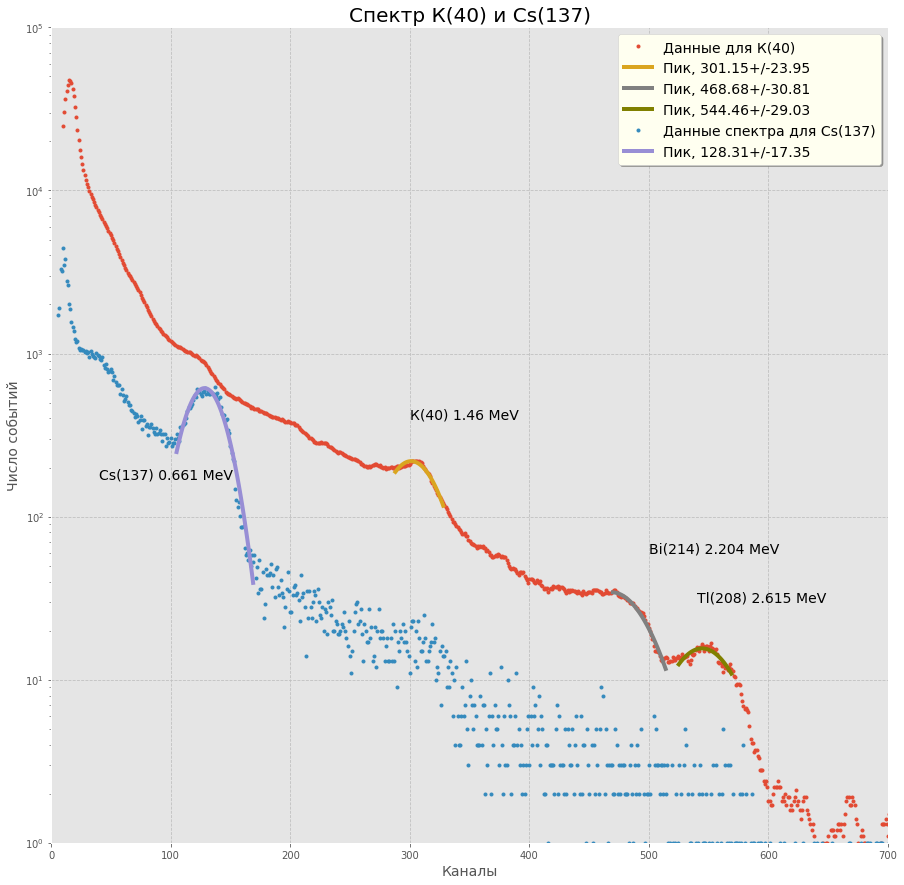

In [3]:
#Калибровка на К(40) и Цезий(137)
Itog1 = pd.read_csv(r"D:\spektri\msp01-20_K40_24.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp01-19_K40_24.19", delim_whitespace = True, names = names)
Itog3 = pd.read_csv(r"D:\spektri\sp_K40_14_30.dat", delim_whitespace = True, names = names)
Itog4 = pd.read_csv(r"D:\spektri\msp01-18_K40_8h.19", delim_whitespace = True, names = names)

x = Itog1.index
arr = pd.DataFrame([Itog1[i] + Itog2[i]+ Itog3[i]+ Itog4[i] for i in names]).T
arr['4'] = arr['4'].rolling(window = 10).mean()

plt.figure(figsize = (15, 15))
plt.yscale('log')
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr['4'],'.', label = 'Данные для К(40)')
plt.ylim([1, 100000])
plt.xlim([0,700])

# Первый пик на К(40) 1.146 MeV
x  = arr[288:329].index
y  = arr[288:329]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10,300,100])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         color = 'goldenrod', linewidth = 4)
arr_col.loc[5,0] = popt[0]
arr_col.loc[5,1] = popt[1]
arr_col.loc[5,2] = 1.46
plt.text(300, 400, 'К(40) 1.46 MeV', size = 14)

# Второй пик на К(40) 2.204 MeV Bi(214) 
x = arr[470:515].index
y = arr[470:515]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10,460,100])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         color = 'grey', linewidth = 4)
arr_col.loc[6,0] = popt[0]
arr_col.loc[6,1] = popt[1]
arr_col.loc[6,2] = 2.204
plt.text(500, 60, 'Bi(214) 2.204 MeV', size = 14)

# Третий пик на К(40) Tl(208) 2.615 MeV
x = arr[525:570].index
y = arr[525:570]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10,550,10])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         color = 'olive', linewidth = 4)
arr_col.loc[7,0] = popt[0]
arr_col.loc[7,1] = popt[1]
arr_col.loc[7,2] = 2.43
plt.text(540, 30, 'Tl(208) 2.615 MeV', size = 14)

# Построение цезиевого пика
Itog = pd.read_csv(r"D:\spektri\msp01-23_Cs_5h.19", delim_whitespace = True, names = names)
plt.plot(Itog['4'],'.', label = 'Данные спектра для Cs(137)')

x = Itog[105:170].index
y = Itog[105:170]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10,130,600])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         linewidth = 4)
arr_col.loc[8,0] = popt[0]
arr_col.loc[8,1] = popt[1]
arr_col.loc[8,2] = 0.661
plt.text(40, 170, 'Cs(137) 0.661 MeV', size = 14)

plt.title('Спектр К(40) и Cs(137)', size = 20)
plt.xlabel('Каналы', size = 14)
plt.ylabel('Число событий', size = 14)
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.grid(True, linestyle='--', color='0.75')

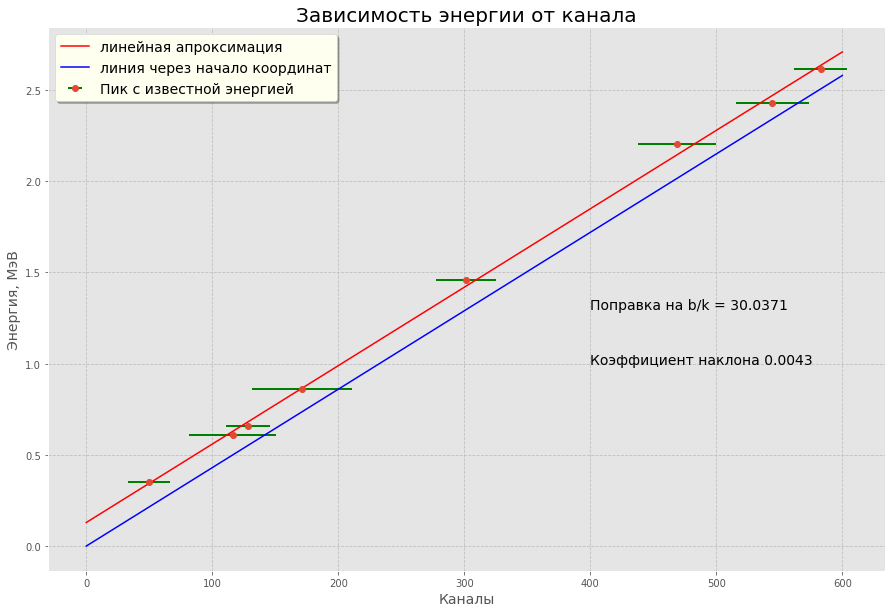

In [4]:
# Построение прямой для пересчета
x1 = np.linspace(0, 600, 300)
plt.figure(figsize = (15,10))
plt.grid(True, linestyle='--', color='0.75')
plt.title('Зависимость энергии от канала', size = 20)
plt.xlabel('Каналы', size = 14)
plt.ylabel('Энергия, МэВ', size = 14)

z=np.polyfit(
    x = arr_col[1],
    y = arr_col[2],
    deg = 1)

plt.plot(x1, z[0]*x1+z[1], 'r-', label = 'линейная апроксимация')
plt.errorbar(
    arr_col[1],
    arr_col[2],
    xerr = arr_col[0],
    fmt='o', ecolor='g', linewidth=2, label = 'Пик с известной энергией')

plt.text(400, 1.3, 'Поправка на b/k = %s' %round(z[1]/z[0], 4), size = 14 )
plt.text(400, 1, 'Коэффициент наклона %s' %round(z[0], 4), size = 14 )
plt.plot(x1, z[0]*x1, 'b-', label = 'линия через начало координат')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

### Спектры для K40, Cs 137  с поправкой на нулевой канал

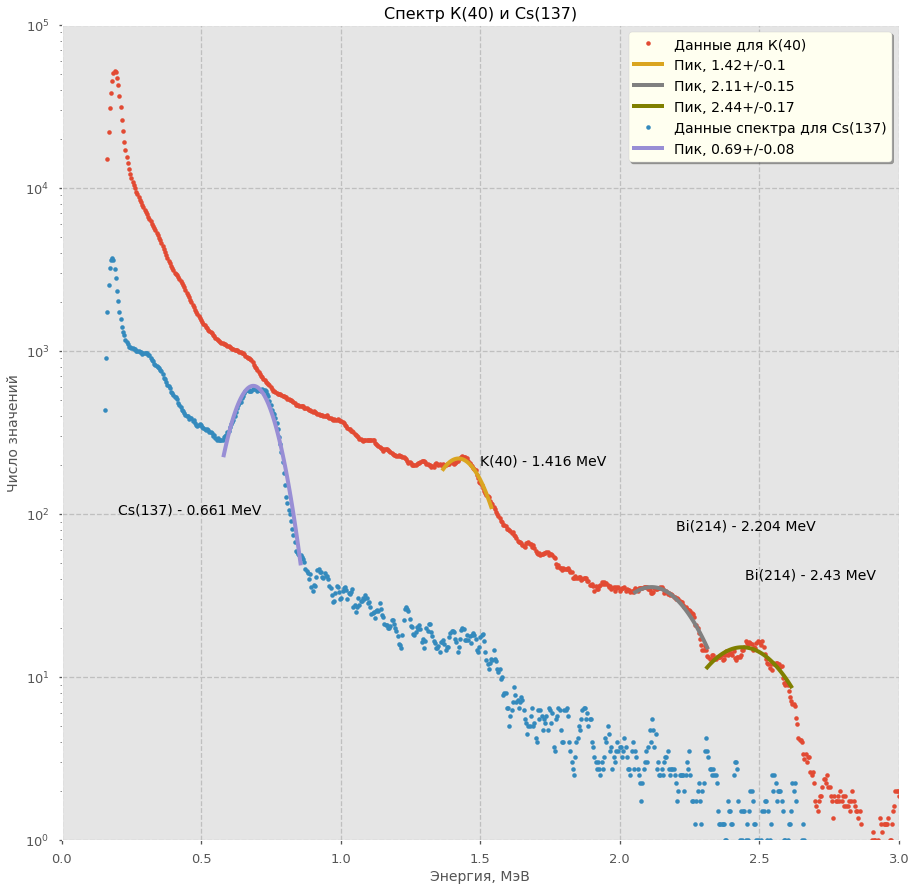

In [60]:
plt.style.use('seaborn-talk')
Itog1 = pd.read_csv(r"D:\spektri\msp01-20_K40_24.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp01-19_K40_24.19", delim_whitespace = True, names = names)
Itog3 = pd.read_csv(r"D:\spektri\sp_K40_14_30.dat",   delim_whitespace = True, names = names)
Itog4 = pd.read_csv(r"D:\spektri\msp01-18_K40_8h.19", delim_whitespace = True, names = names)
l = z[0]
l1 = z[1]

arr = pd.DataFrame([Itog1[i] + Itog2[i]+ Itog3[i]+ Itog4[i] for i in names]).T
x = arr.index*l + l1
arr = arr.rolling(window = 8).mean()

plt.figure(figsize = (15, 15))
plt.yscale('log')
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr['4'],'.', label = 'Данные для К(40)')
plt.ylim([1, 100000])
plt.xlim([0,3])

# Первый пик на К(40) 1.416 MeV
x  = arr[288:329].index*l+l1
y  = arr[288:329]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10*l,300*l+l1,100])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         color = 'goldenrod', linewidth = 4)
plt.text(1.5, 200, 'K(40) - 1.416 MeV', size = 14)

# Второй пик на К(40) 2.204 MeV Bi(214) 
x = arr[448:509].index*l+l1
y = arr[448:509]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10*l, 460*l+l1,100])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         color = 'grey', linewidth = 4)
plt.text(2.2, 80, 'Bi(214) - 2.204 MeV', size = 14)

# Третий пик на К(40) Bi(214) 2.43 MeV
x = arr[508:579].index*l+l1
y = arr[508:579]['4']
popt, pcov = curve_fit(func_gauss, x, y, p0=[10*l,550*l+l1,10])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         color = 'olive', linewidth = 4)
plt.text(2.45, 40, 'Bi(214) - 2.43 MeV', size = 14)

# Аппроксимация цезия
Itog = pd.read_csv(r"D:\spektri\msp01-23_Cs_5h.19", delim_whitespace = True, names = names).rolling(window = 4).mean()
plt.plot(Itog.index*l+l1, Itog['4'],'.', label = 'Данные спектра для Cs(137)')
x = Itog[105:170].index*l+l1
y = (Itog[105:170]['4'])
popt, pcov = curve_fit(func_gauss, x, y, p0=[10*l,130*l+l1,600])
plt.plot(x, func_gauss(x, *popt),
         label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)),
         linewidth = 4)
plt.text(0.2, 100, 'Cs(137) - 0.661 MeV', size = 14)

plt.title('Спектр К(40) и Cs(137)', size = 16)
plt.xlabel('Энергия, МэВ', size = 14)
plt.ylabel('Число значений', size = 14)
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.grid(True, linestyle='--', color='0.75')

### Вычитание спектра фона из спектра камней
### Гран Сассо

30.070972240120295 число для камне


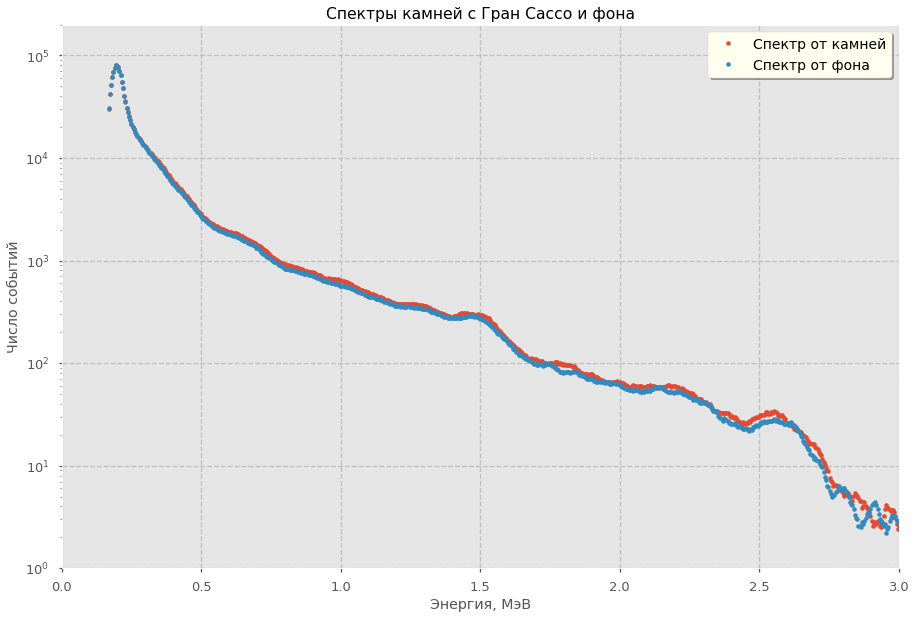

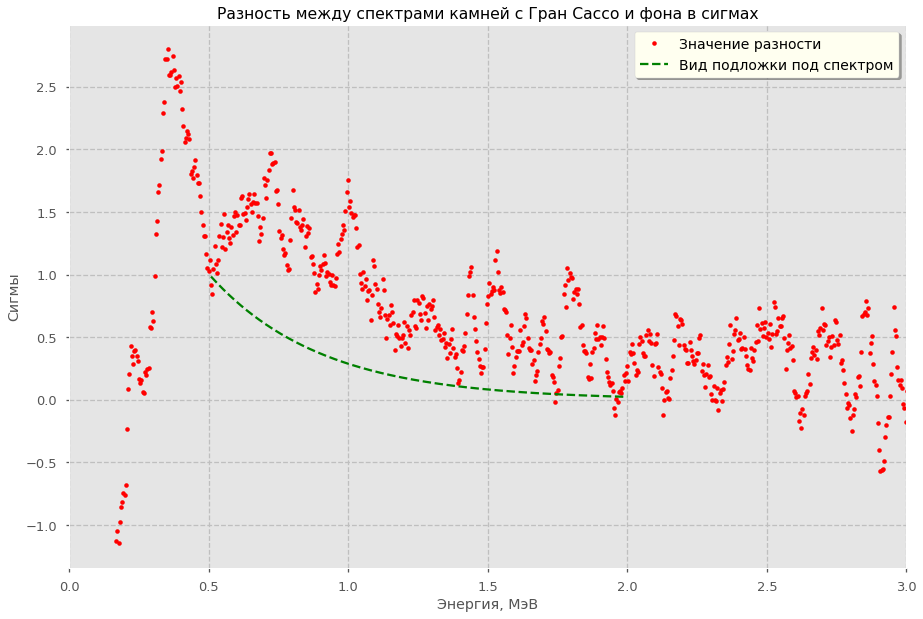

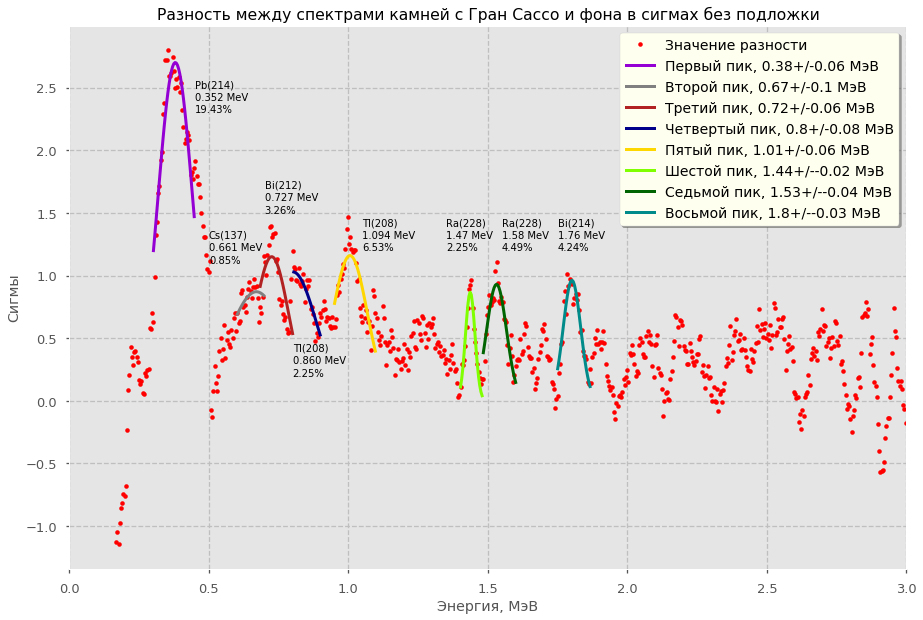

In [65]:
names = ['0','1','2','3','4','5','6','7']
l = z[0]
l1 = z[1]

# Чтение данных за 5 дней для камней
arr_roc = pd.read_csv(r"D:\spektri\msp01-25_roks_24h.19", delim_whitespace = True, names = names)
for i in range(26,30,1):
    Itog = pd.read_csv(r"D:\spektri\msp01-%s_roks_24h.19" %i, delim_whitespace = True, names = names)
    arr_roc = pd.DataFrame([arr_roc[i] + Itog[i] for i in names]).T
    
#Чтение данных за 5 дней для фона
arr_fon = pd.read_csv(r"D:\spektri\msp01-31_fon_24h.19", delim_whitespace = True, names = names)
for i in range(1,5,1):
    Itog = pd.read_csv(r"D:\spektri\msp02-0%s_fon_24h.19" %i, delim_whitespace = True, names = names)
    arr_fon = pd.DataFrame([arr_fon[i] + Itog[i] for i in names]).T
    
# При сглаживании линейным полиномом ошибка в определении среднего уменьшается как сигма/корень(числа точек+1)
arr_fon = arr_fon.rolling(window = 10).mean()
arr_roc = arr_roc.rolling(window = 10).mean()
arr_raz = (arr_roc['4'] - arr_fon['4'])
x = arr_fon.index*l + l1
pogr = abs((arr_fon['4']**0.5 + arr_roc['4']**0.5) ) - abs(arr_raz)**0.5 + abs(arr_raz/10)**0.5 

# Общий вид спектров
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_roc['4'], '.', label = 'Спектр от камней')
plt.plot(x, arr_fon['4'], '.', label = 'Спектр от фона')
plt.yscale('log')
plt.xlim([0,3])
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.xlabel('Энергия, МэВ')
plt.ylabel('Число событий')
plt.title('Спектры камней с Гран Сассо и фона')
plt.ylim([1, 2*10**5])

# Спектр разности в сигмах
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, (arr_raz/pogr), 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.xlabel('Энергия, МэВ')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами камней с Гран Сассо и фона в сигмах')
plt.plot(x[88:436], 3.5*np.exp(-x[88:436]*2.5), 'g--', label = 'Вид подложки под спектром')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

# Выравнивание по фону
sig_arr = (arr_raz/pogr[0:88]).dropna(axis = 'index')
sig_arr = sig_arr.append( (arr_raz[88:436]/pogr[88:436]) - 3.5*np.exp(-x[88:436]*2.5))
sig_arr = sig_arr.append(arr_raz[436:668]/pogr[436:668])

# Спектр разности в сигмах
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(sig_arr.index*l+l1, sig_arr, 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.xlabel('Энергия, МэВ')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами камней с Гран Сассо и фона в сигмах без подложки')

# Аппроксимация в интервале (0.3, 0.45)
x1 = x[(x>=0.3) & (x<=0.45)]
y1 = sig_arr[(sig_arr.index*l+l1>=0.3) & (sig_arr.index*l+l1<=0.45)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.4,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[0], linewidth = 3,
         label = 'Первый пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(0.45, 2.5, 'Pb(214)')
plt.text(0.45, 2.4, '0.352 MeV')
per = sum( sig_arr[(sig_arr.index >= int((0.3-l1)/l)) & (sig_arr.index <= int((0.45-l1)/l))] ) / sum(abs(sig_arr)) * 100
plt.text(0.45, 2.3, '%s' %round(per,2)+'%')
print(sum(y1)/2.5, 'число для камне')

# Аппроксимация в интервале (0.6, 0.7)
x1 = x[(x>=0.6) & (x<=0.7)]
y1 = sig_arr[(sig_arr.index*l+l1>=0.6) & (sig_arr.index*l+l1<=0.7)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.65,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[1], linewidth = 3,
         label = 'Второй пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(0.5, 1.3, 'Cs(137)')
plt.text(0.5, 1.2, '0.661 MeV')
per = ( sum( sig_arr[(sig_arr.index>=int((0.6-l1)/l)) & (sig_arr.index <= int((0.7-l1)/l))] )- 
(int((0.7-l1)/l) - int((0.6-l1)/l))* 0.7) / sum(abs(sig_arr)) * 100
plt.text(0.5, 1.1, '%s' %round(per,2)+'%')

# Аппроксимация в интервале (0.7, 0.8)
x1 = x[(x>=0.68) & (x<=0.8)]
y1 = sig_arr[(sig_arr.index*l+l1>=0.68) & (sig_arr.index*l+l1<=0.8)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.01,0.7,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[2], linewidth = 3,
         label = 'Третий пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(0.7, 1.7, 'Bi(212)')
plt.text(0.7, 1.6, '0.727 MeV')
per = ( sum( sig_arr[(sig_arr.index>=int((0.7-l1)/l)) & (sig_arr.index <= int((0.8-l1)/l))] )- 
(int((0.8-l1)/l) - int((0.7-l1)/l))* 0.5) / sum(abs(sig_arr)) * 100
plt.text(0.7, 1.5, '%s' %round(per,2)+'%')

# Аппроксимация в интервале (0.8, 0.9)
x1 = x[(x>=0.8) & (x<=0.9)]
y1 = sig_arr[(sig_arr.index*l+l1>=0.8) & (sig_arr.index*l+l1<=0.9)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.85,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[3], linewidth = 3,
         label = 'Четвертый пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(0.8, 0.4, 'Tl(208)')
plt.text(0.8, 0.3, '0.860 MeV')
per = ( sum( sig_arr[(sig_arr.index>=int((0.8-l1)/l)) & (sig_arr.index <= int((0.9-l1)/l))] )- 
(int((0.9-l1)/l) - int((0.8-l1)/l))* 0.5) / sum(abs(sig_arr)) * 100
plt.text(0.8, 0.2, '%s' %round(per,2)+'%')

# Аппроксимация в интервале (0.95, 1.1)
x1 = x[(x>0.95) & (x<1.1)]
y1 = sig_arr[(sig_arr.index*l+l1>0.95) & (sig_arr.index*l+l1<1.1)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,1,1])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[4], linewidth = 3,
         label = 'Пятый пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(1.05, 1.4, 'Tl(208)')
plt.text(1.05, 1.3, '1.094 MeV')
per = ( sum( sig_arr[(sig_arr.index>=int((0.95-l1)/l)) & (sig_arr.index <= int((1.1-l1)/l))] )- 
(int((1.1-l1)/l) - int((0.95-l1)/l))* 0.2) / sum(abs(sig_arr)) * 100
plt.text(1.05, 1.2, '%s' %round(per,2)+'%')

# Аппроксимация в интервале (1.4, 1.48)
x1 = x[(x>1.4) & (x<1.48)]
y1 = sig_arr[(sig_arr.index*l+l1>1.4) & (sig_arr.index*l+l1<1.48)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,1.4,1])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[5], linewidth = 3,
         label = 'Шестой пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(1.35, 1.4, 'Ra(228)')
plt.text(1.35, 1.3, '1.47 MeV')
per = sum( sig_arr[(sig_arr.index>=int((1.4-l1)/l)) & (sig_arr.index <= int((1.48-l1)/l))] ) / sum(abs(sig_arr)) * 100
plt.text(1.35, 1.2, '%s' %round(per,2)+'%')

# Аппроксимация в интервале (1.48, 1.6)
x1 = x[(x>1.48) & (x<1.6)]
y1 = sig_arr[(sig_arr.index*l+l1>1.48) & (sig_arr.index*l+l1<1.6)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,1.5,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[6], linewidth = 3,
         label = 'Седьмой пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(1.55, 1.4, 'Ra(228)')
plt.text(1.55, 1.3, '1.58 MeV')
per = sum( sig_arr[(sig_arr.index>=int((1.48-l1)/l)) & (sig_arr.index <= int((1.6-l1)/l))] ) / sum(abs(sig_arr)) * 100
plt.text(1.55, 1.2, '%s' %round(per,2)+'%')

# Аппроксимация в интервале (1.75, 1.87)
x1 = x[(x>1.75) & (x<1.87)]
y1 = sig_arr[(sig_arr.index*l+l1>1.75) & (sig_arr.index*l+l1<1.87)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,1.8,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[7], linewidth = 3,
         label = 'Восьмой пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(1.75, 1.4, 'Bi(214)')
plt.text(1.75, 1.3, '1.76 MeV')
per = sum( sig_arr[(sig_arr.index>=int((1.75-l1)/l)) & (sig_arr.index <= int((1.87-l1)/l))] ) / sum(abs(sig_arr)) * 100
plt.text(1.75, 1.2, '%s' %round(per,2)+'%')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

### Вычитание из фона спектра для К40

52.944306020743454


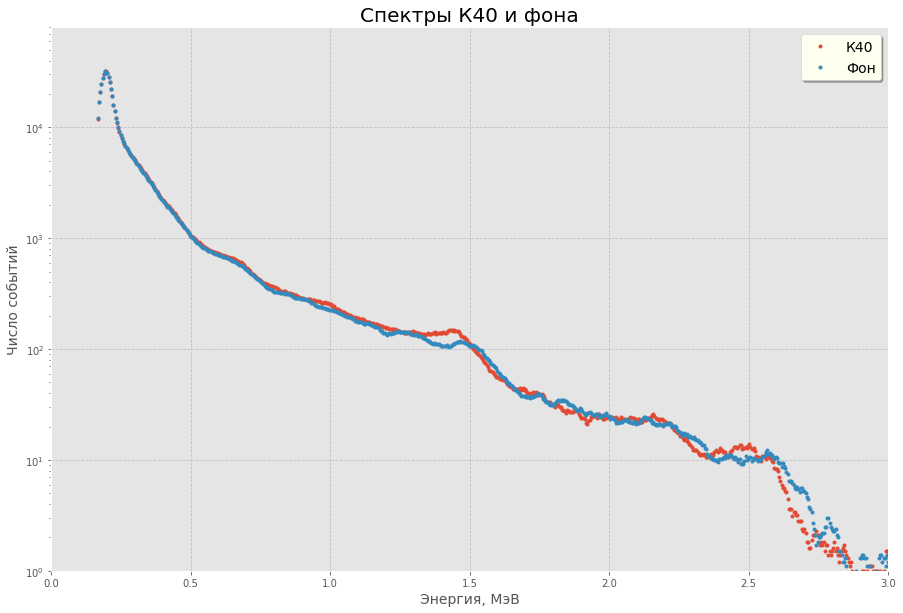

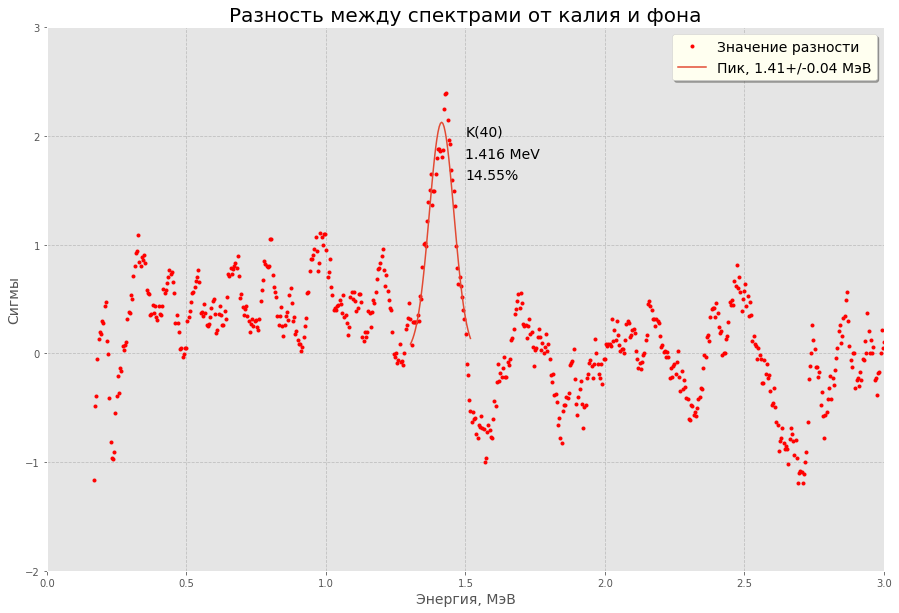

In [87]:
l = z[0]
l1 = z[1]
names = ['0','1','2','3','4','5','6','7']

# Чтение данных за 48 часов для К40
Itog1 = pd.read_csv(r"D:\spektri\msp01-20_K40_24.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp01-19_K40_24.19", delim_whitespace = True, names = names)
arr_K = pd.DataFrame([Itog1[i] + Itog2[i] for i in names]).T

# Чтение данных за 48 часов для фона
Itog3 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
Itog4 = pd.read_csv(r"D:\spektri\msp02-02_fon_24h.19", delim_whitespace = True, names = names)
arr_F = pd.DataFrame([Itog3[i] + Itog4[i] for i in names]).T

# При сглаживании линейным полиномом ошибка в определении среднего уменьшается как сигма/корень(числа точек+1)
arr_F = arr_F.rolling(window = 10).mean()
arr_K = arr_K.rolling(window = 10).mean()
arr_raz = (arr_K['4'] - arr_F['4'])
pogr = abs( (arr_F['4']**0.5 + arr_K['4']**0.5) ) - abs(arr_raz)**0.5 + abs(arr_raz/10)**0.5 
x = arr_fon.index*l + l1

# Общий вид спектров
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_K['4'],'.', label = 'К40')
plt.plot(x, arr_F['4'],'.', label = 'Фон')
plt.xlim([0,3])
plt.yscale('log')
plt.ylim([1, 8*10**4])
plt.title('Спектры К40 и фона', size = 20)
plt.ylabel('Число событий', size = 14)
plt.xlabel('Энергия, МэВ', size = 14)
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

# Спектр разности в терминах ошибки
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_raz/pogr, 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.ylim([-2,3])
plt.xlabel('Энергия, МэВ', size = 14)
plt.ylabel('Сигмы', size = 14)
plt.title('Разность между спектрами от калия и фона', size = 20)

# Аппроксимация в интервале (0.95, 1.1)
x1 = x[(x>1.30) & (x<1.52)]
y1 = arr_raz[(arr_raz.index*l+l1>1.30) & (arr_raz.index*l+l1<1.52)]/pogr[(pogr.index*l+l1>1.30) & (pogr.index*l+l1<1.52)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,1.4,2])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.text(1.5, 2, 'K(40)', size = 14)
plt.text(1.5, 1.8, '1.416 MeV', size = 14)
per = sum(y1)/sum(abs(arr_raz/pogr).dropna())*100
plt.text(1.5, 1.6, '%s'%round(per, 2)+'%', size = 14)
print(sum(y1))

### Вычитание из фона спектра со Sr

154.38655912832812

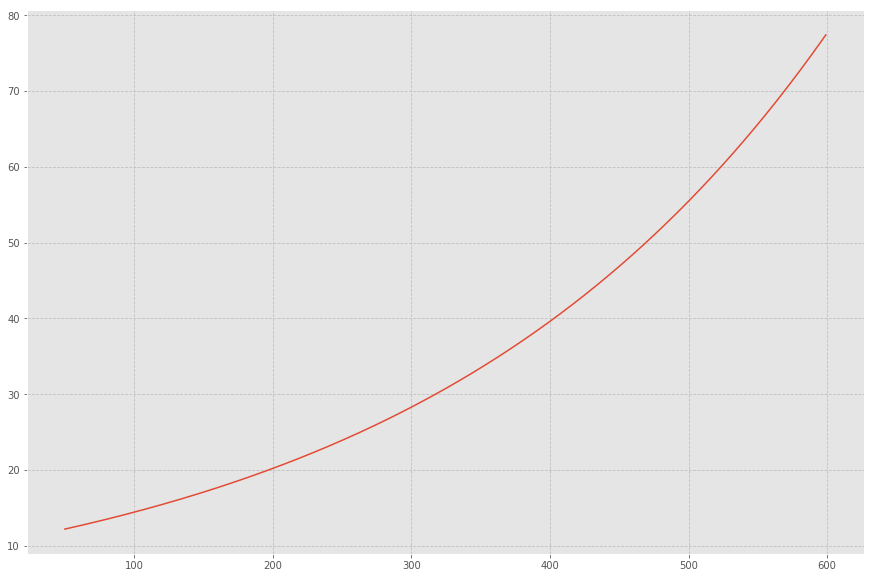

In [62]:
popt, pcov = curve_fit(func_exp, arr_int.index, arr_int[0], p0=[50,100])

plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot( f, np.exp(f1/popt[0])*popt[1] )
#print(
#    sum(
#        [1/550*(arr_int[i] - (fit_lin[0]*f1[i] + fit_lin[1]))**2 for i in range(550)]
#    )
#)
#[(arr_int[i] - (fit_lin[0]*f1[i] + fit_lin[1]))**2 for i in range(550)]
sum( [(arr_int[0][i] - (fit_lin[0]*f1[i] + fit_lin[1]))**2 for i in range(550)] )/550


[1.37455241e-04 4.05634141e-02 1.01863850e+01]
154.38655912832812 Среднеквадратичное отклонение для линейной зависимости
144.78164073426262 Среднеквадратичное отклонение для квадратичной зависимости
146.2009276371926 Среднеквадратичное отклонение для экспоненциальной зависимости


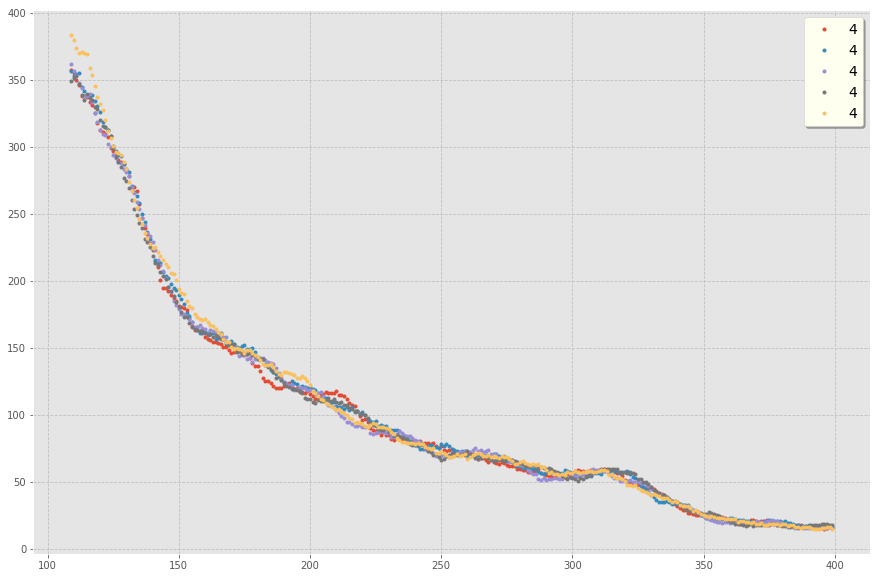

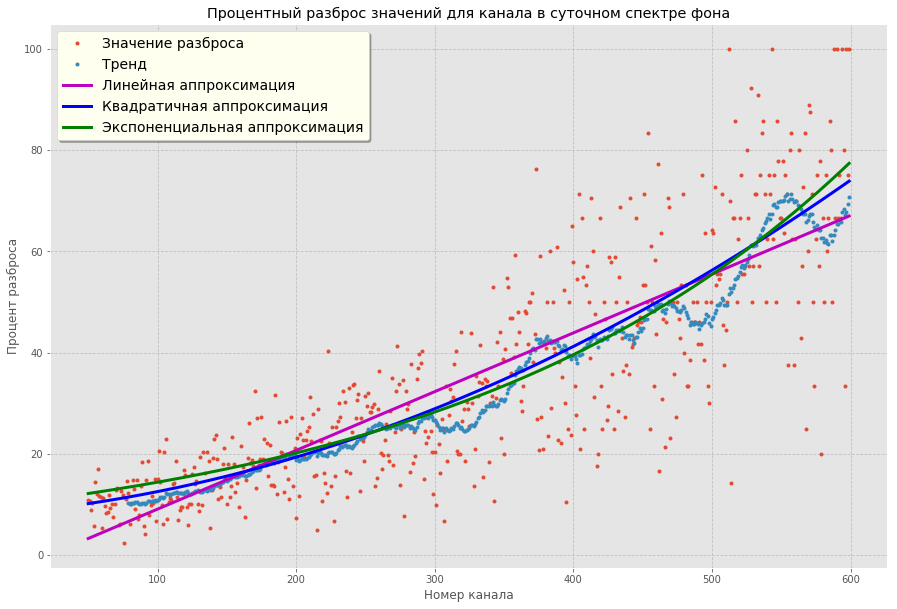

In [71]:
names = ['0','1','2','3','4','5','6','7']
data1 = pd.read_csv(r"D:\spektri\msp02-04_fon_24h.19", delim_whitespace = True, names = names)
data2 = pd.read_csv(r"D:\spektri\msp02-03_fon_24h.19", delim_whitespace = True, names = names)
data3 = pd.read_csv(r"D:\spektri\msp02-02_fon_24h.19", delim_whitespace = True, names = names)
data4 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
data5 = pd.read_csv(r"D:\spektri\msp01-31_fon_24h.19", delim_whitespace = True, names = names)

plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(data1['4'][100:400].rolling(window = 10).mean(), '.')
plt.plot(data2['4'][100:400].rolling(window = 10).mean(), '.')
plt.plot(data3['4'][100:400].rolling(window = 10).mean(), '.')
plt.plot(data4['4'][100:400].rolling(window = 10).mean(), '.')
plt.plot(data5['4'][100:400].rolling(window = 10).mean(), '.')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

arr_int = pd.DataFrame([ 
    (max(data1['4'][i], data2['4'][i], data3['4'][i], data4['4'][i], data5['4'][i]) -
    min(data1['4'][i], data2['4'][i], data3['4'][i], data4['4'][i], data5['4'][i])) /
    max(data1['4'][i], data2['4'][i], data3['4'][i], data4['4'][i], data5['4'][i]) * 100
    for i in range(50,600,1)
])

fit_lin = np.polyfit(arr_int.index, arr_int[0], 1)
fit_sq = np.polyfit(arr_int.index, arr_int[0], 2)
f = [i for i in range(50,600,1)]
f1 = arr_int.index
popt, pcov = curve_fit(func_exp, arr_int.index, arr_int[0], p0=[50,100])

plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(f, arr_int, '.', label = 'Значение разброса')
plt.xlabel('Номер канала')
plt.ylabel('Процент разброса')
plt.plot([i for i in range(50,600,1)], arr_int.rolling(window = 30).mean(), '.', label = 'Тренд')
plt.plot(f, fit_lin[0]*f1 + fit_lin[1], 'm-', label = 'Линейная аппроксимация', linewidth = 3)
plt.plot(f, fit_sq[0]*f1**2 + fit_sq[1]*f1 + fit_sq[2], 'b-', label = 'Квадратичная аппроксимация', linewidth = 3)
plt.plot( f, np.exp(f1/popt[0])*popt[1], 'g-', label = 'Экспоненциальная аппроксимация', linewidth = 3)
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.title('Процентный разброс значений для канала в суточном спектре фона')
print(fit_sq)
print(
        sum( [(arr_int[0][i] - (fit_lin[0]*f1[i] + fit_lin[1]))**2 for i in range(550)] )/550,
    'Среднеквадратичное отклонение для линейной зависимости'
)

print(
        sum( [(arr_int[0][i] - (fit_sq[0]*f1[i]**2 + fit_sq[1]*f1[i] + fit_sq[2]))**2 for i in range(550)] )/550,
    'Среднеквадратичное отклонение для квадратичной зависимости'
)

print(
        sum( [(arr_int[0][i] - (np.exp(f1[i]/popt[0])*popt[1]))**2 for i in range(550)] )/550,
    'Среднеквадратичное отклонение для экспоненциальной зависимости'
)

214.95425235658166


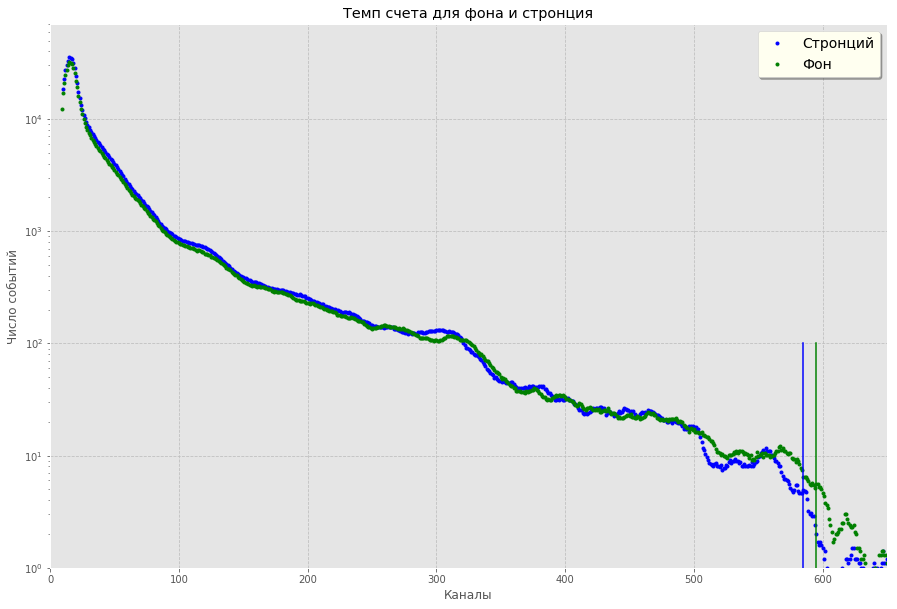

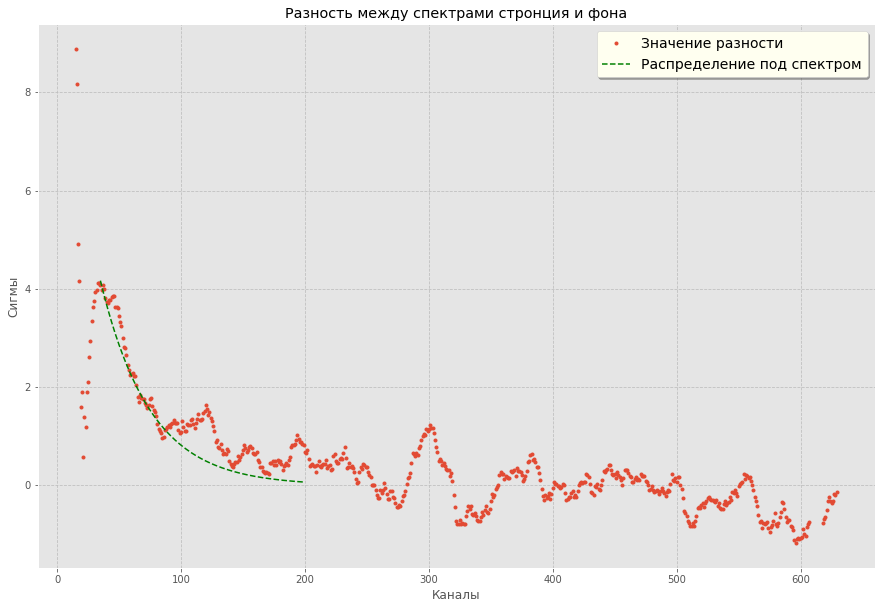

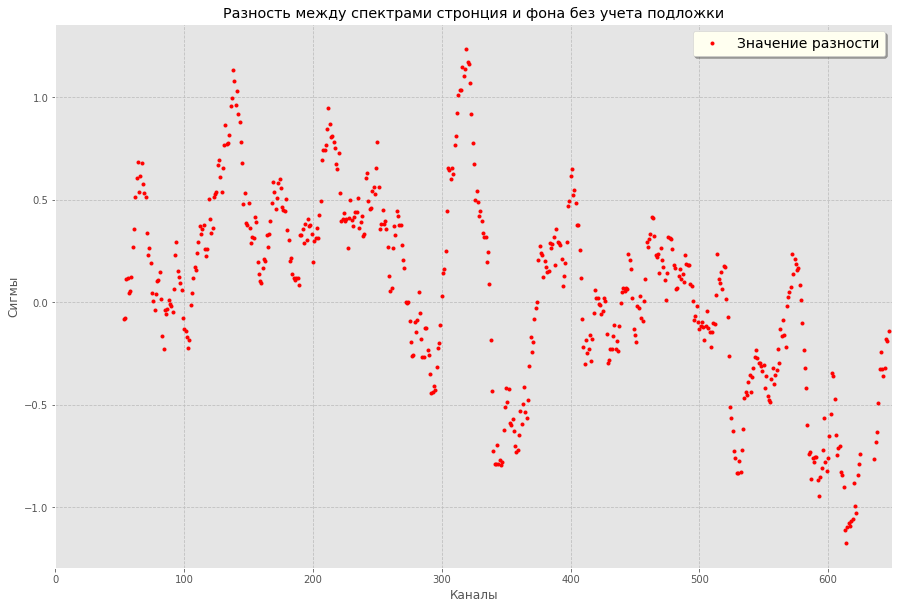

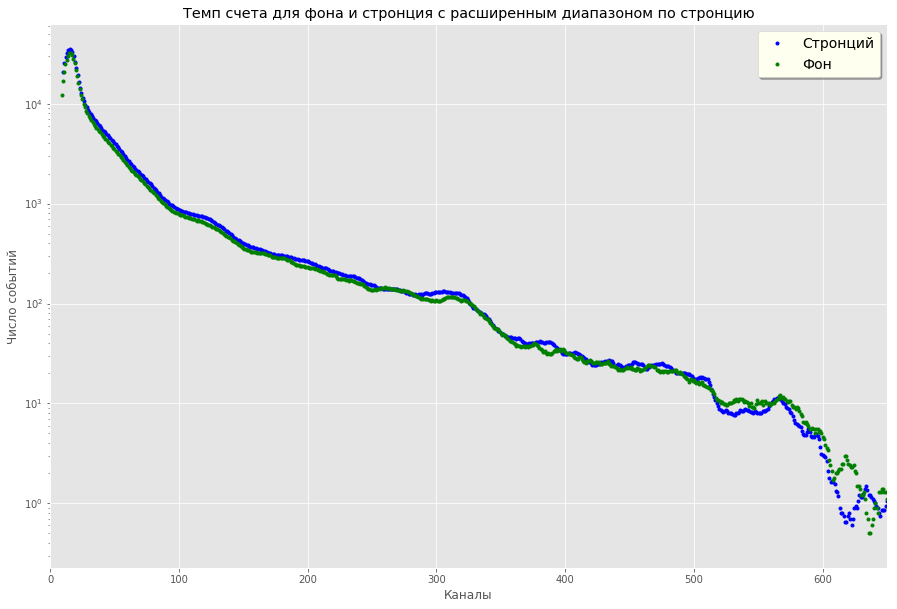

In [89]:
names = ['0','1','2','3','4','5','6','7']
l = z[0]
l1 = z[1]
# Чтение данных за 48 часов для Sr(90)
arr1 = pd.read_csv(r"D:\spektri\msp01-21_Sr_9h.19", delim_whitespace = True, names = names)
arr2 = pd.read_csv(r"D:\spektri\msp01-22_X_24.19", delim_whitespace = True, names = names)
arr3 = pd.read_csv(r"D:\spektri\sp_X_14_30.dat", delim_whitespace = True, names = names)
arr_X = pd.DataFrame([arr1[i] + arr2[i] + arr3[i] for i in names]).T
arr_X['ind'] = arr_X.index*595/585

# Чтение данных за 48 часов для фона
Itog3 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
Itog4 = pd.read_csv(r"D:\spektri\msp02-02_fon_24h.19", delim_whitespace = True, names = names)
arr_F = pd.DataFrame([Itog3[i] + Itog4[i] for i in names]).T

plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(arr_X['4'].rolling(window = 10).mean(), 'b.', label = 'Стронций')
plt.plot(arr_F['4'].rolling(window = 10).mean(), 'g.', label = 'Фон')
plt.yscale('log')
plt.xlim([0, 650])
plt.ylim([1, 7*10**4])
plt.xlabel('Каналы')
plt.ylabel('Число событий')
plt.title('Темп счета для фона и стронция')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.plot([595, 595], [1, 100], 'g-')
plt.plot([585, 585], [1, 100], 'b-')


q = [
    (
    (arr_X['4'][i]*(arr_X['ind'][i]%1)**2 + arr_X['4'][i+1]*(arr_X['ind'][i+1]%1)**2) / 
    ((arr_X['ind'][i]%1)**2 + (arr_X['ind'][i+1]%1)**2) 
) for i in range(650)
]

x = arr_F.index

pogr = abs( (arr_F['4']**0.5 + arr_X['4']**0.5) ) 
arr_raz = ((q - arr_F['4'][0:650]) / pogr[0:650]).rolling(window = 10).mean()
print( sum(arr_raz[0:100].dropna()))
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(arr_raz, '.', label = 'Значение разности')
plt.xlabel('Каналы')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами стронция и фона')
plt.plot(x[35:200], 10*np.exp(-x[35:200]/40), 'g--', label = 'Распределение под спектром')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

# Выравнивание по фону
sig_arr = (arr_raz[0:35]).dropna(axis = 'index')
sig_arr = sig_arr.append( (arr_raz[35:200]) - 10*np.exp(-x[35:200]/40) )
sig_arr = sig_arr.append(arr_raz[200:668])

# Спектр разности в терминах ошибки
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x[53:668], sig_arr[20:668], 'r.', label = 'Значение разности')
plt.xlim([0,650])
plt.xlabel('Каналы')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами стронция и фона без учета подложки')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')


q = pd.DataFrame(q)
plt.figure(figsize = (15, 10))
plt.plot(arr_X['ind'][0:650], q.rolling(window = 10).mean(), 'b.', label = 'Стронций')
plt.plot(arr_F['4'].rolling(window = 10).mean(), 'g.', label = 'Фон')
plt.yscale('log')
plt.xlim([0, 650])
plt.xlabel('Каналы')
plt.ylabel('Число событий')
plt.title('Темп счета для фона и стронция с расширенным диапазоном по стронцию')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
#plt.text(100, 6, 
#"""Спектры дискретные, поэтому значения для каналов усреднялось 
#    как средневзвешанное по соседним двум точкам.
#Спектр стронция был домножен на значение 595/585,
#    тоесть на отношение каналов с одинаковым спектром.""", size = 12)

In [1]:
Itog

NameError: name 'Itog' is not defined

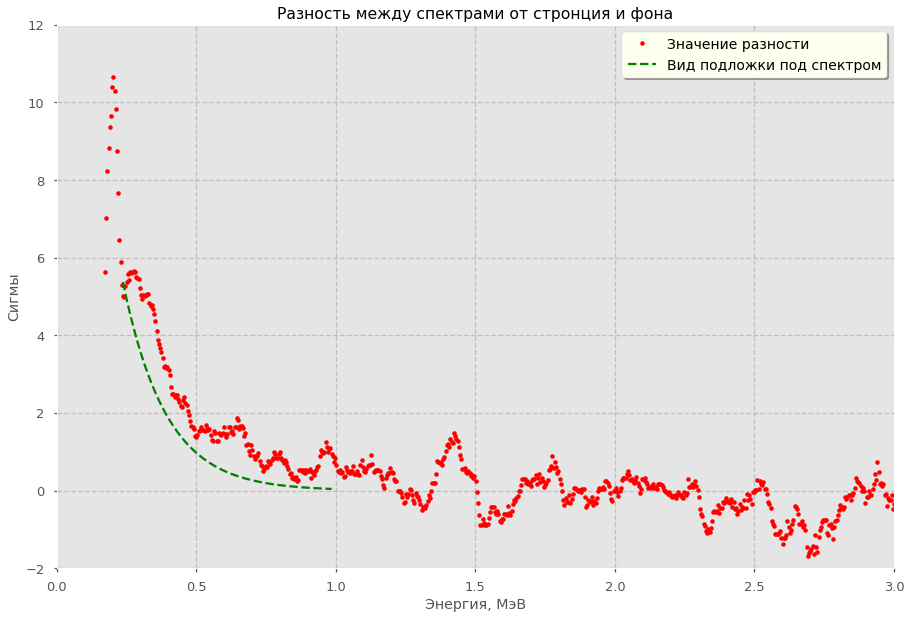

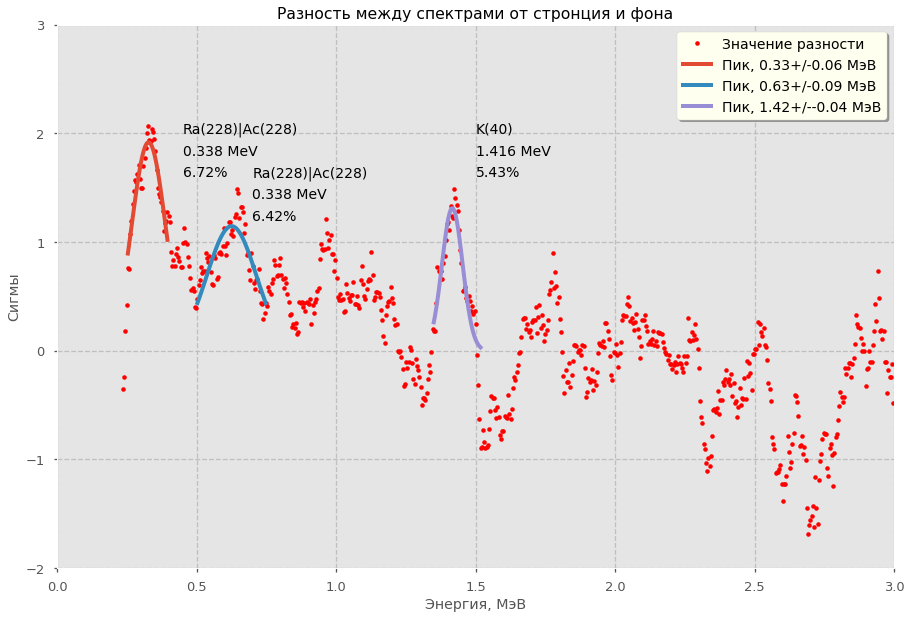

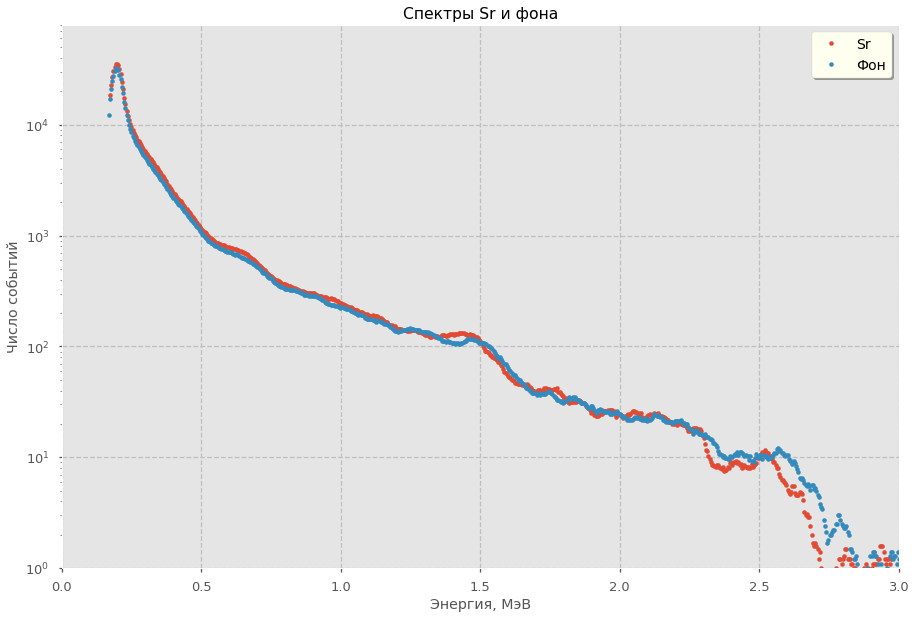

In [62]:
l = z[0]
l1 = z[1]
names = ['0','1','2','3','4','5','6','7']

# Чтение данных за 48 часов для Sr(90)
arr1 = pd.read_csv(r"D:\spektri\msp01-21_Sr_9h.19", delim_whitespace = True, names = names)
arr2 = pd.read_csv(r"D:\spektri\msp01-22_X_24.19", delim_whitespace = True, names = names)
arr3 = pd.read_csv(r"D:\spektri\sp_X_14_30.dat", delim_whitespace = True, names = names)
arr_X = pd.DataFrame([arr1[i] + arr2[i] + arr3[i] for i in names]).T

# Чтение данных за 48 часов для фона
Itog3 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
Itog4 = pd.read_csv(r"D:\spektri\msp02-02_fon_24h.19", delim_whitespace = True, names = names)
arr_F = pd.DataFrame([Itog3[i] + Itog4[i] for i in names]).T

# При сглаживании линейным полиномом ошибка в определении среднего уменьшается как сигма/корень(числа точек+1)
arr_F = arr_F.rolling(window = 10).mean()
arr_X = arr_X.rolling(window = 10).mean()
arr_raz = arr_X['4'] - arr_F['4']
pogr = abs( (arr_F['4']**0.5 + arr_X['4']**0.5) ) - abs(arr_raz)**0.5 + abs(arr_raz/10)**0.5 
x = arr_F.index*l + l1

# Спектр разности в сигмах
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_raz/pogr, 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.ylim([-2,12])
plt.xlabel('Энергия, МэВ')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами от стронция и фона')
plt.plot(x[25:200], 25*np.exp(-x[25:200]*6.5), 'g--', label = 'Вид подложки под спектром')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

# Выравнивание по фону
sig_arr = (arr_raz/pogr[0:25]).dropna(axis = 'index')
sig_arr = sig_arr.append( (arr_raz[25:200]/pogr[25:200]) - 25*np.exp(-x[25:200]*6.5) )
sig_arr = sig_arr.append(arr_raz[200:668]/pogr[200:668])

# Спектр разности в терминах ошибки
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x[10:668], sig_arr, 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.ylim([-2,3])

# Аппроксимация в интервале (0.25, 0.4)
x1 = x[(x>0.25) & (x< 0.4)]
y1 = sig_arr[(sig_arr.index*l+l1>0.25) & (sig_arr.index*l+l1< 0.4)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.3,2])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
per = (sum(y1)-0.5*(0.4-0.25))/sum(abs(arr_raz/pogr).dropna())*100
plt.text(0.45, 2, 'Ra(228)|Ac(228)', size = 14)
plt.text(0.45, 1.8, '0.338 MeV', size = 14)
plt.text(0.45, 1.6, '%s'%round(per, 2)+'%', size = 14)

# Аппроксимация в интервале (0.5, 0.75)
x1 = x[(x>0.5) & (x< 0.75)]
y1 = sig_arr[(sig_arr.index*l+l1>0.5) & (sig_arr.index*l+l1< 0.75)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.6,2])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
per = (sum(y1)-0.3*(0.75-0.5))/sum(abs(arr_raz/pogr).dropna())*100
plt.text(0.7, 1.6, 'Ra(228)|Ac(228)', size = 14)
plt.text(0.7, 1.4, '0.338 MeV', size = 14)
plt.text(0.7, 1.2, '%s'%round(per, 2)+'%', size = 14)

# Аппроксимация в интервале (1.35, 1.52)
x1 = x[(x>1.35) & (x<1.52)]
y1 = sig_arr[(sig_arr.index*l+l1>1.35) & (sig_arr.index*l+l1<1.52)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,1.4,2])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
per = sum(y1)/sum(abs(sig_arr).dropna())*100
plt.text(1.5, 2, 'K(40)', size = 14)
plt.text(1.5, 1.8, '1.416 MeV', size = 14)
plt.text(1.5, 1.6, '%s'%round(per, 2)+'%', size = 14)
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.xlabel('Энергия, МэВ')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами от стронция и фона')

# Общий вид спектров
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_X['4'],'.', label = 'Sr')
plt.plot(x, arr_F['4'],'.', label = 'Фон')
plt.xlim([0,3])
plt.yscale('log')
plt.ylim([1, 8*10**4])
plt.title('Спектры Sr и фона')
plt.ylabel('Число событий')
plt.xlabel('Энергия, МэВ')
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')

### Новые камни
### Тибетские

34.31896733784209


Text(0.8,1.6,'4.12%')

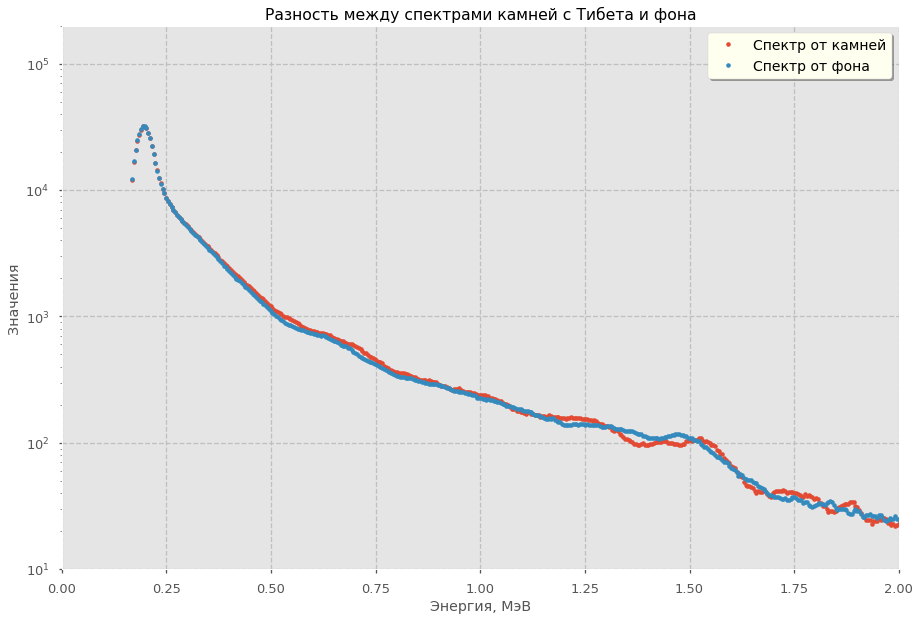

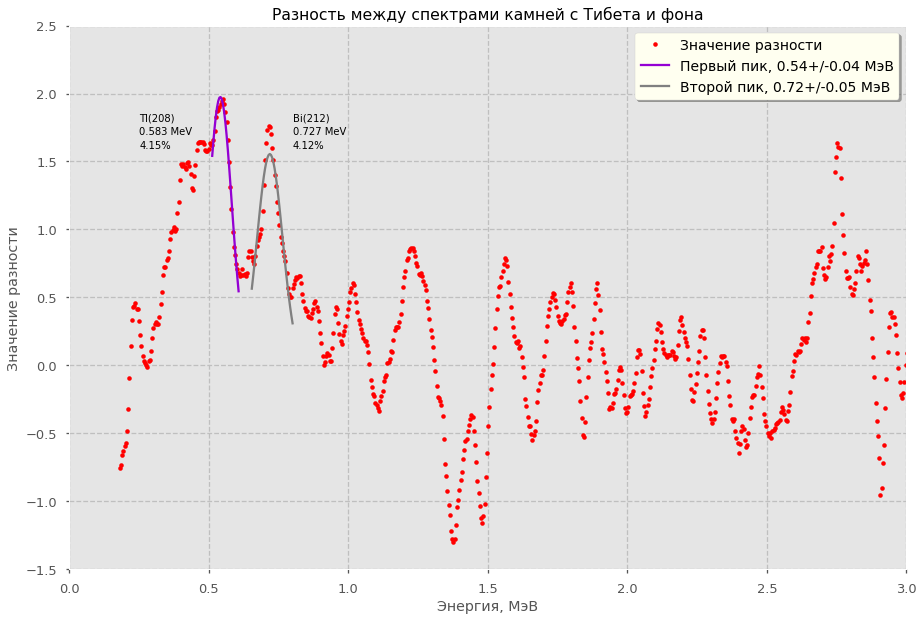

In [63]:
names = ['0','1','2','3','4','5','6','7']
l = z[0]
l1 = z[1]

# Чтение данных за 2 полных дня и 2 частичных (139 по 30 минут)
Itog1 = pd.read_csv(r"D:\spektri\msp02-14_RN_24h.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp02-14_RN_24h.19", delim_whitespace = True, names = names)
arr_roc = pd.DataFrame([Itog1[i] + Itog2[i] for i in names]).T

#Чтение данных за 5 дней для фона
Itog1 = pd.read_csv(r"D:\spektri\msp01-31_fon_24h.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
arr_fon = pd.DataFrame([Itog1[i] + Itog2[i] for i in names]).T 
    
# При сглаживании линейным полиномом ошибка в определении среднего уменьшается как сигма/корень(числа точек+1)
arr_fon = arr_fon.rolling(window = 10).mean()
arr_roc = arr_roc.rolling(window = 10).mean()
arr_raz = (arr_roc['4'] - arr_fon['4']).rolling(window = 4).mean()
x = arr_fon.index*l + l1
pogr = abs( (arr_fon['4']**0.5 + arr_roc['4']**0.5) ) - abs(arr_raz)**0.5 + abs(arr_raz/10)**0.5

# Общий вид спектров
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_roc['4'], '.', label = 'Спектр от камней')
plt.plot(x, arr_fon['4'], '.', label = 'Спектр от фона')
plt.yscale('log')
plt.xlim([0,2])
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.xlabel('Энергия, МэВ')
plt.ylabel('Значения')
plt.title('Разность между спектрами камней с Тибета и фона')
plt.ylim([10, 2*10**5])

# Спектр разности в терминах ошибки
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_raz/pogr, 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.ylim([-1.5, 2.5])
plt.xlabel('Энергия, МэВ')
plt.ylabel('Значение разности')
plt.title('Разность между спектрами камней с Тибета и фона')

# Аппроксимация в интервале (0.25, 0.55)
x1 = x[(x>0.51) & (x<0.61)]
y1 = arr_raz[(arr_raz.index*l+l1>0.51) & (arr_raz.index*l+l1<0.61)]/pogr[(pogr.index*l+l1>0.51) & (pogr.index*l+l1<0.61)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.5,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[0],
         label = 'Первый пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.text(0.25, 1.8, 'Tl(208)')
plt.text(0.25, 1.7, '0.583 MeV')
per = (sum(y1)-(114-89)*0.6)/sum(abs(arr_raz/pogr).dropna())*100
plt.text(0.25, 1.6, '%s'%round(per, 2)+'%')

# Аппроксимация в интервале (0.6, 0.75)
x1 = x[(x>0.65) & (x<0.8)]
y1 = arr_raz[(arr_raz.index*l+l1>0.65) & (arr_raz.index*l+l1<0.8)]/pogr[(pogr.index*l+l1>0.65) & (pogr.index*l+l1<0.8)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[0.1,0.7,2])
plt.plot(x1, func_gauss(x1, *popt), '-', color = colors[1],
         label = 'Второй пик, %s+/-%s МэВ' % (round(popt[1], 2), round(popt[0], 2)) )
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.text(0.8, 1.8, 'Bi(212)')
plt.text(0.8, 1.7, '0.727 MeV')
per = (sum(y1)-(158-122)*0.5)/sum(abs(arr_raz/pogr).dropna())*100
plt.text(0.8, 1.6, '%s'%round(per, 2)+'%')

### Источник торий

509.93717564867535


(1, 200000)

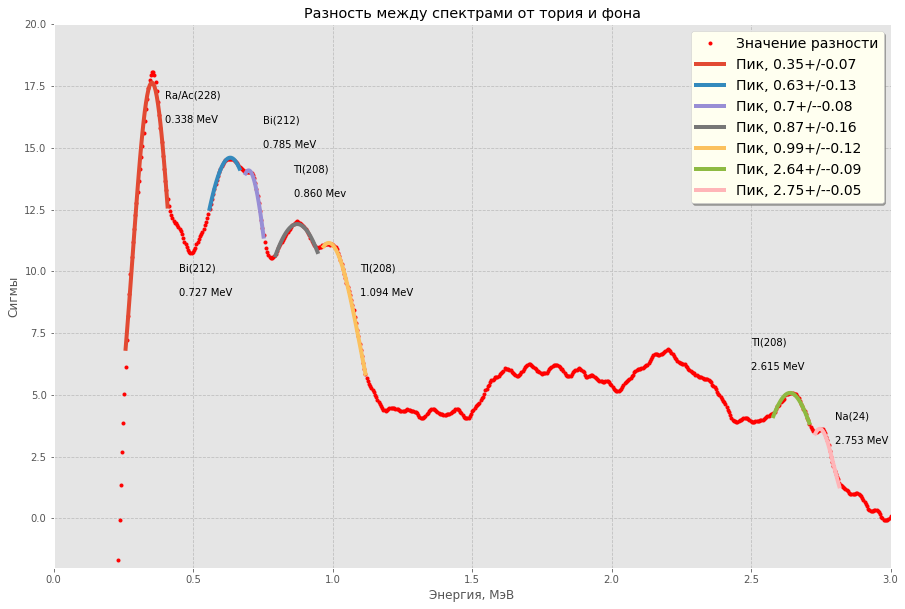

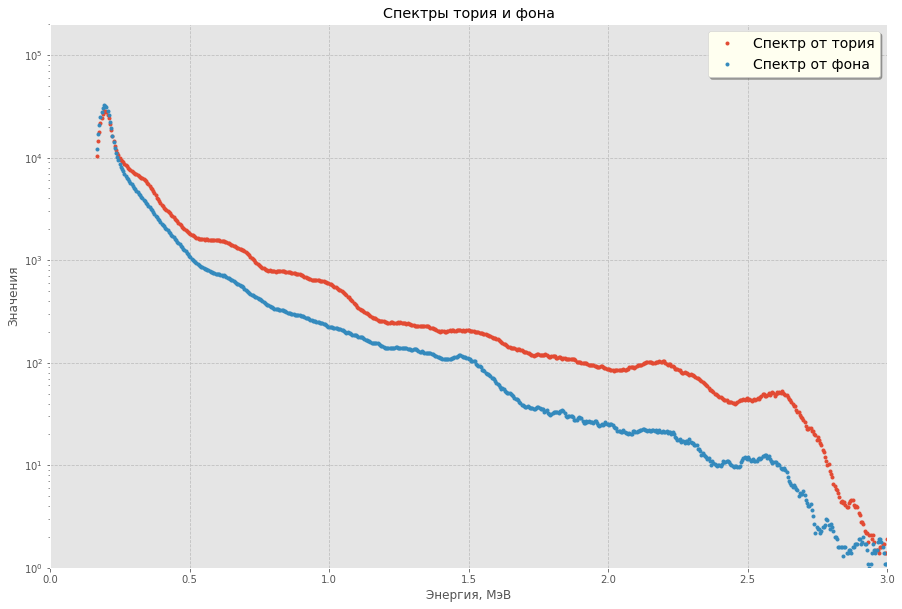

In [93]:
names = ['0','1','2','3','4','5','6','7']
l = z[0]
l1 = z[1]

# Чтение данных за 2 полных дня
Itog2 = pd.read_csv(r"D:\spektri\msp02-16_Th_24.19", delim_whitespace = True, names = names)
Itog3 = pd.read_csv(r"D:\spektri\msp02-17_Th_24.19", delim_whitespace = True, names = names)
arr_Th = pd.DataFrame([Itog3[i] + Itog2[i] for i in names]).T

#Чтение данных за 5 дней для фона
Itog1 = pd.read_csv(r"D:\spektri\msp01-31_fon_24h.19", delim_whitespace = True, names = names)
Itog2 = pd.read_csv(r"D:\spektri\msp02-01_fon_24h.19", delim_whitespace = True, names = names)
arr_fon = pd.DataFrame([Itog1[i] + Itog2[i] for i in names]).T 

arr_fon = arr_fon.rolling(window = 10).mean()
arr_Th = arr_Th.rolling(window = 10).mean()
arr_raz = (arr_Th['4'] - arr_fon['4']).rolling(window = 6).mean()
x = arr_Th.index*l + l1
pogr = (abs( (arr_fon['4']**0.5 + arr_Th['4']**0.5) ) - ( abs(arr_raz)/10 ) **0.5).rolling(window = 6).mean()

# Спектр разности в терминах ошибки
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, (arr_raz/pogr), 'r.', label = 'Значение разности')
plt.xlim([0,3])
plt.ylim([-2, 20])
plt.xlabel('Энергия, МэВ')
plt.ylabel('Сигмы')
plt.title('Разность между спектрами от тория и фона')

# Аппроксимация в интервале (30, 65) Pb(214) 0.295 MeV
x1 = arr_raz[(arr_raz.index>=30) & (arr_raz.index<=65)].index*l + l1
y1 = arr_raz[(arr_raz.index>=30) & (arr_raz.index<=65)]/pogr[(pogr.index>=30) & (pogr.index<=65)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,50*l,10])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )
per = (sum(y1) - 6*(65-30)*l - 1/2*5*(65-30)*l)/sum( abs(arr_raz/pogr).dropna() )*100
print(sum(y1))
# Аппроксимация в интервале (100, 125) Bi(214) 0.609 MeV
x1 = arr_raz[(arr_raz.index>=100) & (arr_raz.index<=125)].index*l + l1
y1 = arr_raz[(arr_raz.index>=100) & (arr_raz.index<=125)]/pogr[(pogr.index>=100) & (pogr.index<=125)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,110*l,10])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )

# Аппроксимация в интервале (130, 145) Bi(214) 0.609 MeV
x1 = arr_raz[(arr_raz.index>=130) & (arr_raz.index<=145)].index*l + l1
y1 = arr_raz[(arr_raz.index>=130) & (arr_raz.index<=145)]/pogr[(pogr.index>=130) & (pogr.index<=145)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,135*l,10])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )

# Аппроксимация в интервале (155, 190) Tl(208) 0.860 Mev
x1 = arr_raz[(arr_raz.index>=155) & (arr_raz.index<=190)].index*l + l1
y1 = arr_raz[(arr_raz.index>=155) & (arr_raz.index<=190)]/pogr[(pogr.index>=155) & (pogr.index<=190)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,170*l,400])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )

# Аппроксимация в интервале (195, 230) Ra(228) 0.966 MeV
x1 = arr_raz[(arr_raz.index>=195) & (arr_raz.index<=230)].index*l + l1
y1 = arr_raz[(arr_raz.index>=195) & (arr_raz.index<=230)]/pogr[(pogr.index>=195) & (pogr.index<=230)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,200*l,10])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )

# Аппроксимация в интервале (570, 600) Tl(208) 2.615 MeV
x1 = arr_raz[(arr_raz.index>=570) & (arr_raz.index<=600)].index*l + l1
y1 = arr_raz[(arr_raz.index>=570) & (arr_raz.index<=600)]/pogr[(pogr.index>=570) & (pogr.index<=600)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,580*l,5])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )

# Аппроксимация в интервале (605, 625) Tl(208) 2.615 MeV
x1 = arr_raz[(arr_raz.index>=605) & (arr_raz.index<=625)].index*l + l1
y1 = arr_raz[(arr_raz.index>=605) & (arr_raz.index<=625)]/pogr[(pogr.index>=605) & (pogr.index<=625)]
popt, pcov = curve_fit(func_gauss, x1, y1, p0=[1,610*l,5])
plt.plot(x1, func_gauss(x1, *popt), '-', label = 'Пик, %s+/-%s' % (round(popt[1], 2), round(popt[0], 2)), linewidth = 4 )

plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.text(0.4, 17, 'Ra/Ac(228)')  
plt.text(0.4, 16, '0.338 MeV')
plt.text(0.45, 10, 'Bi(212)') ###
plt.text(0.45, 9, '0.727 MeV')
plt.text(0.86, 14, 'Tl(208)')
plt.text(0.86, 13, '0.860 Mev')
plt.text(2.5, 7, 'Tl(208)')
plt.text(2.5, 6, '2.615 MeV')
plt.text(2.8, 4, 'Na(24)')
plt.text(2.8, 3, '2.753 MeV')
plt.text(1.1, 10, 'Tl(208)')
plt.text(1.1, 9, '1.094 MeV')
plt.text(0.75, 16, 'Bi(212)')
plt.text(0.75, 15, '0.785 MeV')

# Общий вид спектров
plt.figure(figsize = (15, 10))
plt.grid(True, linestyle='--', color='0.75')
plt.plot(x, arr_Th['4'],  '.', label = 'Спектр от тория')
plt.plot(x, arr_fon['4'], '.', label = 'Спектр от фона')
plt.yscale('log')
plt.xlim([0,3])
plt.legend(fontsize  = 14, shadow=True, facecolor = 'ivory')
plt.xlabel('Энергия, МэВ')
plt.ylabel('Значения')
plt.title('Спектры тория и фона')
plt.ylim([1, 2*10**5])